# Аналитика в авиакомпании

### Имеющиеся у нас данные:

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
model — модели самолета
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
city — городах
average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

### Шаг 1. Импортируем и изучаем данные

Для начала импортируем все нужные библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

Загружаем данные.

In [3]:
models=pd.read_csv('/datasets/query_1.csv')
cities=pd.read_csv('/datasets/query_3.csv')

Изучаем данные.

In [4]:
print(models.info())
display(models.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В данном датасете никаких проблем не видно: по-разному написанных вариантов одной и той же модели нет, числа имеют числовой тип данных. Посмотрим на второй датасет.

In [5]:
print(cities.info())
display(cities.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Здесь на первый взгляд проблем также нет. Среднее число рейсов представлено числами с плавающей точкой. Пропусков нет. Перейдем к следующему шагу.

### Выбираем топ-10 городов по количеству рейсов

In [6]:
display(cities.sort_values(by='average_flights', ascending=False).head(10))

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


С большим отрывом лидирует Москва, что неудивительно. Дальше следует Петербург, что также не вызывает вопросов. Удивляет наличие в топ-10 Брянска и Ульяновска, а также отсутствие Казани и не очень высокая позиция Сочи, что особенно удивительно для августа. 

Перейдем к следующему шагу.

### Строим графики

Начнем с графика моделей самолетов и количества рейсов.

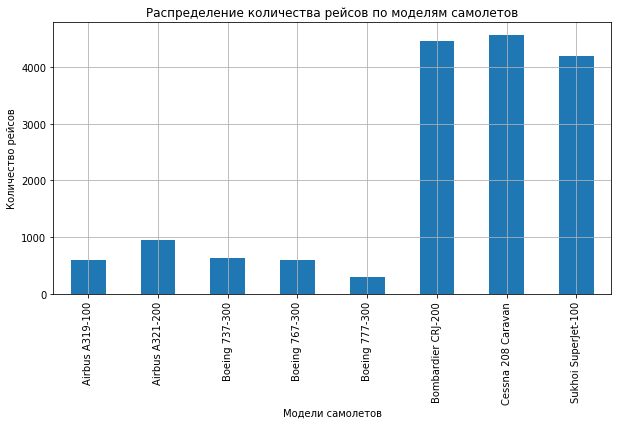

In [62]:
models.plot(kind='bar', y='flights_amount', x='model', title='Распределение количества рейсов по моделям самолетов',
            grid=True, figsize=(10,5), legend=False)
plt.xlabel('Модели самолетов')
plt.ylabel('Количество рейсов')
plt.show()

Мы видим, что наибольшее количество полетов у недорогих самолетов региональной и малой авиации - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Они предназначены для частых полетов на небольшие расстояния и могут совершать большее количество рейсов в день на один самолет, а их невысокая цена позволяет закупить большее их количество. Более традиционные модели Airbus и Boeing следуют далее с большим отрывом от первой тройки и с относительно небольшим отрывом друг от друга. Такие самолеты обычно используются для полетов на более длительные расстояния и перевозят большее количество пассажиров - следовательно, среднее количество полетов на один самолет у них меньше. Кроме того, свою роль может играть и более высокая цена, делаяющая такие самолеты рентабельными не для всех направлений.

Перейдем к графику городов и количества рейсов в каждый из них.

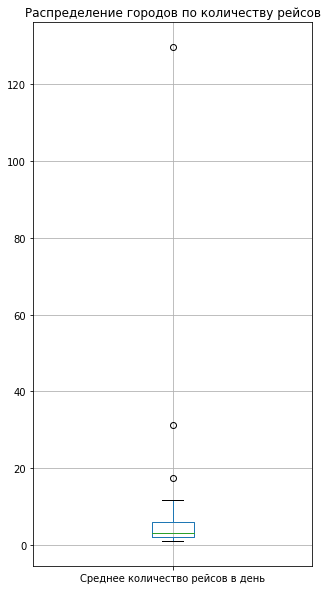

In [51]:
cities.plot(kind='box', y='average_flights', figsize=(5,10), grid=True, title='Распределение городов по количеству рейсов', label='Среднее количество рейсов в день')
plt.show()

Как видим, у нас есть один очень большой выброс вверх - это Москва, и два выброса поменьше - это Санкт-Петербург и Новосибирск. Далее начиная примерно с 11 рейсов в день начинается основная группа городов. При этом обращает на себя внимание, что среднее гораздо больше медианы - это значит, что есть большое количество городов с малым количеством рейсов.

В целом полученные данные говорят о том, что все авиасообщение строится через Москву: в основном рейсы выполняются не напрямую между разными городами, а с пересадками в Москве, которая выполняет роль транзитного пункта.

Теперь перейдем к графику топ-10 городов и количества рейсов.

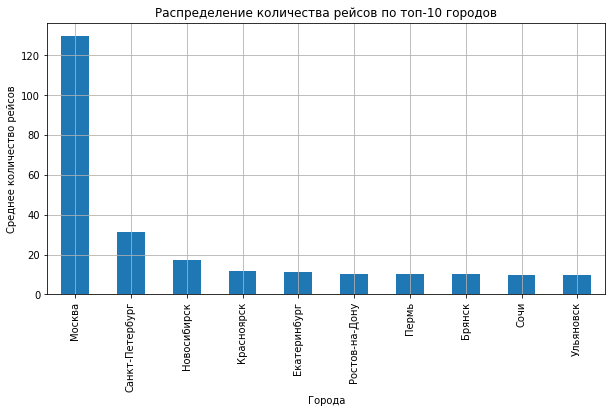

In [61]:
cities.sort_values(by='average_flights', ascending=False).head(10).plot(kind='bar', y='average_flights', x='city', grid=True, figsize=(10,5), legend=False, title='Распределение количества рейсов по топ-10 городов')
plt.xlabel('Города')
plt.ylabel('Среднее количество рейсов')
plt.show()

Топ-10 мы уже изучали, суммируем выводы, сделанные в предыдущих пунктах: с большим отрывом лидирует Москва, которая, помимо того, что привлекает большое количество путешественников сама по себе, выполняет роль транзитного хаба. Дальше следует Петербург, который выполняет туристические и в меньшей степени транзитные функции. Далее следуют крупные города Сибири и Урала, до которых долго добираться на поезде. Удивляет наличие в топ-10 Брянска и Ульяновска, а также отсутствие Казани и не очень высокая позиция Сочи, что особенно удивительно для августа. Возможно, отсутствие Казани (как и Нижнего Новгорода) объясняется относительной близостью к Москве и возможностью добраться туда на поезде. Брянск и Ульяновск возможно выполняют большое количество полетов малой и региональной авиации - мы видели выше в наборе данных моделей самолетов, что такие полеты вносят решающий вклад в общее число полетов.

### Общий вывод

<p>Мы проанализировали два набора данных. Первичный анализ данных не выявил в них проблем или пропусков. <p>
Первый набор содержит данные о том, на каких моделях самолетов совершались рейсы в сентябре 2018 года. В результате анализа этого набора данных мы выяснили, что наибольшее количество полетов совершается на недорогих самолетах региональной и малой авиации - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Это может быть связано с тем, что они имеют невысокую цену - следовательно, таких самолетов больше; с тем, что они рассчитаны на полеты на короткие расстояния - следовательно, могут выполнять больше рейсов в день; с их малой вместительностью - следовательно, требуется большще рейсов для перевозки определенного количества пассажиров. Более традиционные модели Boeing и Airbus идут плотной группой по количеству полетов с очень большим отрывом от лидеров и с не очень большим отрывом друг от друга. 
<p>Второй набор данных содержит информацию о среднем количестве рейсов, прибывавших за день в различные города в августе 2018 года. В результатет анализа этого набора данных было выявлено, что с большим отрывом лидирует Москва, что может быть объяснено, помимо прочего, тем, что город выполняет роль транспортного хаба, где совершаются пересадки на рейсы в другие города. Это подтверждается тем, что медиана среднего количества рейсов по городам сильно смещена вниз относительно среднего - это значит, что существует очень большое количество городов с малым количеством рейсов в день. Вероятно, в этом случае речь идет о рейсах из Москвы, которые аккумулируют пассажиров из разных городов, следующих в один город. Далее в рейтинге количества рейсов следует Санкт-Петербург, который выполняет туристические и в меньшей степени также транзитные функции. Далее следуют крупные города Сибири и Урала, до которых долго добираться на поезде - Новосибирск, Красноярск, Екатеринбург. Также в топ-10 городов по количеству рейсов присутствуют Брянск и Ульяновск - возможно, в них как раз совершается большое количество рейсов региональной и малой авиации, о которых мы говорили выше. Сочи присутствует в топ-10, но занимает не очень высокую для августа позицию.
Возможно, отсутствие в первой десятке Казани (как и Нижнего Новгорода) объясняется относительной близостью к Москве и возможностью добраться туда на поезде.